<a href="https://colab.research.google.com/github/chaidosa/100-days-of-DS/blob/main/Day_11_to_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 11

# Principal component analysis (PCA)
Goal: Develop a way to find a "compressed" representation of data. <br/>
<br/>
General steps for PCA <br/>
1. Data Preparation: This involves cleaning data, checking missing values, and normalizing or standardizing the variables if necessary.
<br/>
<br/>
2. Compute the Covariance Matrix: PCA works by finding the directions in which the data varies the most. To do this, we need to compute the covariance matrix, which represents the relationships between the variables in the dataset.
<br/>
<br/>
3. Compute the Eigenvectors and Eigenvalues: After computing the covaraince matrix, we need to find the eigenvectors and eigenvalues. The eigenvectors represent the directions of the data that vary the most, while the eigenvalues represent the amount of variance explained by each eigenvector.
<br/>
<br/>
4. Sort the Eigenvalues: Next, we sort the eigenvalues in descending order. This helps us identify the most important eigenvectors and decide how many principal components to retain.
<br/>
<br/>
5. Choose the Number of Principal Components: The number of principal components to retain depends on the amount of variance we want to explain. A common approach is to retain enough principal components to explain at least 70-80% of the total variance in the dataset.
<br/>
<br/>
6. Compute the Principal Components: We can now compute the principal components by multiplying the standardized data with the eigenvectors corresponding to the selected principal components.
<br/>
<br/>
7. Analyze the Results: Finally, we can analyze the results and interpret the principal components. The principal components can be used for data visualization, data compression, or as input for other machine learning algorithms.


## Sample Example

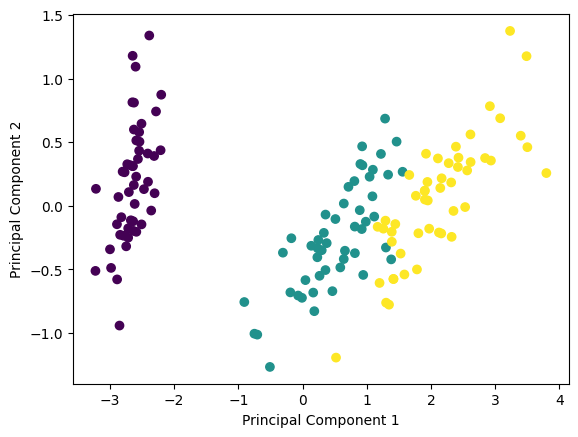

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Loading the iris dataset
d = load_iris()

# Creating a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(d.data)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=d.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In this example, we load the iris dataset, create a PCA object with 2 components, and fit the model to the data. We then transform the data into the 2-dimensional principal component space and plot the results using matplotlib. The resulting plot shows the data points projected onto the first two principal components, with different colors representing the three different classes of iris flowers. This can help us visualize how the data is distributed in the reduced dimensionality space.

#Day 12

# Clustering

Clustering is the process of grouping similar things based on their characteristics. For example, if we have a bunch of fruits, we can group them into clusters of apples, oranges, and bananas based on their color, size, and shape.
<br/>

In data science, clustering is used to find patterns within data that may not be immediately apparent. It involves grouping similar data points into clusters based on their attributes or characteristics. This can be useful for a wide range of applications, such as segmentation, image processing, etc.

<br/>
Today we'll explore the concept of clustering and how it can be applied in data science.


# Setup
Necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs

#Generating Data

To show you how clustering algorithm works, we'll generate artificial/synthetic data using 'make_blobs' function from scikit-learn. This function creates a set of random points in space that are grouped togetther in clusters.

In [ ]:
X, y = make_blobs(n_samples=100, centers=4, random_state=42)

We have created 100 points with 4 centers. Let's visualize how our datset looks like

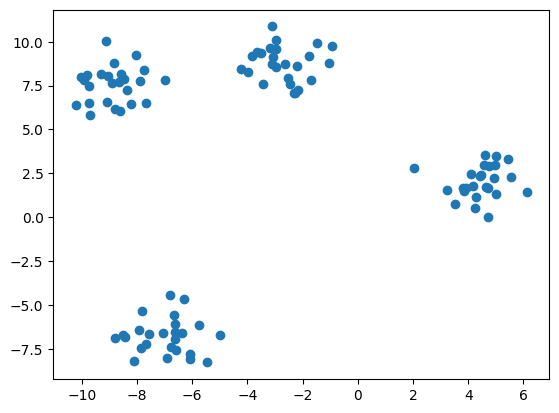

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

As we can see, the points are grouped into distinct clusters. Our goal or task is to automatically identify these clusters using clustering algorithms.

#### Now is the Time for our first algorithm


# K-Means Clustering

This algorithm is the most popular clustering algorithm due to its simplicity and effectiveness more specifically we're looking into Lloyd’s or Elkan’s algorithm [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) .

K-Means works by randomly selecting K points in the data (where K is the number of clusters we want to identify) and assigning each point in the data to the nearest cluster. It then updates the centroid of each cluster to be the mean of all the points assigned to that cluster, This process is repeated until the centroids no longer move.<br/>
<br/>
To implement K-Means in scikit-learn, we'll use the 'KMeans' class

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

We've initialized KMeans with 4 clusters and fit it to our data. Now we'll visualize the same

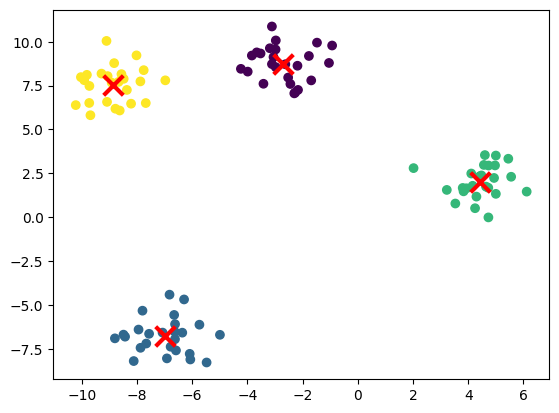

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

The colored points represent the clusters identified by K-Means, and the red X's represent the centroids of those clusters. As you can see, K-Means has done a good job of identifying the underlying clusters in our data.

#### Here, I have provided an overview of how things work in the KMeans algorithm. However, it is always important to delve into the nitty-gritty details. I encourage individuals to read the documentation for the code, and for more in-depth concepts, I would suggest reading materials topic-wise. If anyone would like me to include additional reading material, please do let me know.

# Hierarchical Clustering
<br/>
Another popular clustering algoritm is Hierarchical Clustering. This algorithm create a hierarchy of clusters by repeatedly merging the two closest clusters until all the points are in a single cluster. <br/>

 To implement Hierarchical Clustering in scikit-learn, we'll use the 'AgglomerativeClustering' class

In [ ]:
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(X)

AgglomerativeClustering(n_clusters=4)

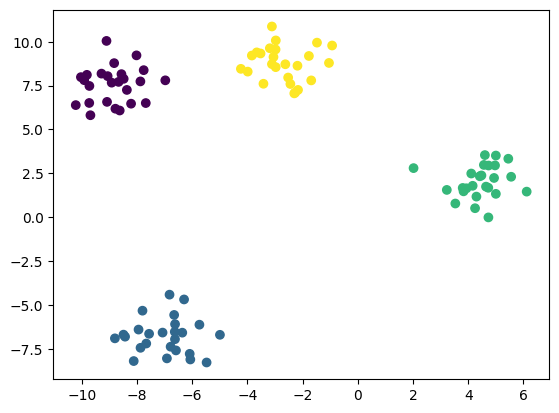

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=hc.labels_)
plt.show()

As one can see Agglomerative clustering has also done the good job

# Challangum (Choosing the number of Clusters)
<br/>
If you have followed carefully, you would have noticed that we chose 4 clusters (hyperparameters) because we knew that was how many clusters the data was generated with. However, the real world can be cruel :) and we may not have this information.
<br/>
<br/>
One way to determine the number of clusters is to use the elbow method. This involves plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters and looking for the "elbow" point, where adding more clusters does not result in a significant decrease in WCSS. Don't worry, we will not be bending our arms for this method!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

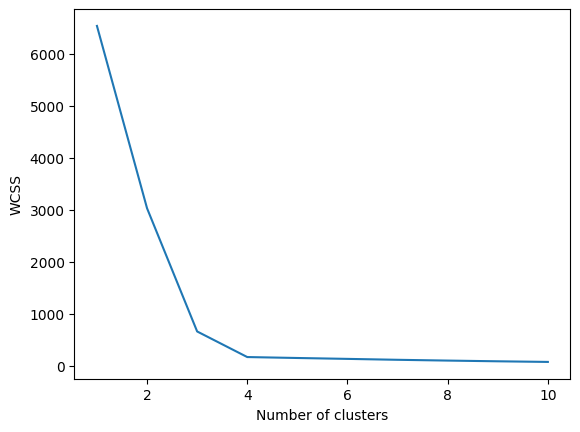

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this case, we can see that the elbow point is at 4, which confirms that our choice of 4 clusters was appropriate.

# Conclusion
In this notebook, we've explored the concept of clustering in data science and implemented two popular clustering algorithms: K-Means and Hierarchical Clustering. We also looked at how to choose the number of clusters using the elbow method.

#### PUN : Why did the data scientist go on a diet? To reduce his variance!

# Day 13
### Linear Regression, Optimizing error function, Gradient descent

Today we will explore the concepts of Linear Regression, optimizing error function and gradient descent in the context of data science.

## Linear Regression
Linear regression is a type of regression analysis that is used to predict a continous outcome variable (also called the dependent variable) based on one or more predictor variables (also called independent variables). The relationship between the outcomes variable and the predictor variables is modeled using linear function.

## Simple Linear Regression
We have already seen this but still we'll do it as a refresher. <br/>

Simple linear regression is the simplest for of linear regression, where there is only one predictor variable. The goal of simple linear regression is to find the best fit line that describes the relationship between the predictor variable and the outcome variable.
<br/>
We will use the Housing dataset, which contains information about the housing values in boston, to perform simple linear regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# boston = load_boston()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

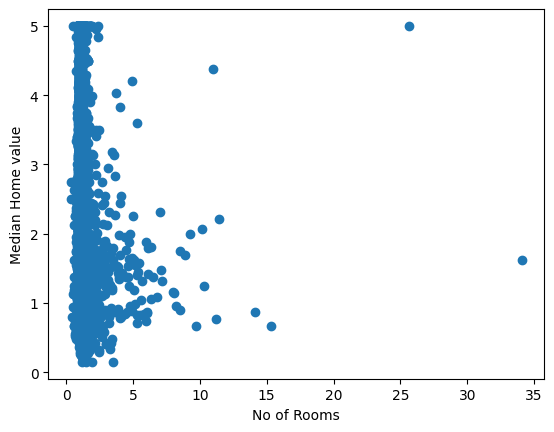

In [ ]:
X = df['AveBedrms'].values.reshape(-1, 1)
y = df['target'].values.reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel('No of Rooms')
plt.ylabel('Median Home value')
plt.show()

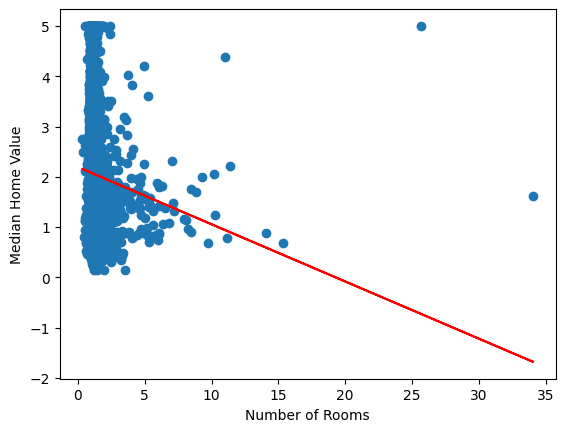

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Home Value')
plt.show()


## Multiple Linear Regression
It is an extension of simple linear regression, wher there are more than one predictor variable. The goal of multiple linear regression is to find the best-fit hyperplane that describes the relationship between the predictor variable and outcome variable.


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
X = df[['HouseAge', 'AveBedrms', 'AveRooms', 'MedInc']]
y = df['target'].values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)


print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)



Coefficients:  [[ 0.01581909  0.99487246 -0.21298304  0.53648081]]
Intercept:  [-0.39580032]
Mean Squared Error: 0.615856645418495


## Optimizing Error Functions
An error function, also called a loss function or a cost function, is a function that measures how well a model fits the data. The goal of optimization is to find the values of the model parameters that minimize the error function

##Mean Squared Error
Mean squared error (MSE) is a commonly used error function for regression problems. MSE measures the average of the squared differences between the predicted values and the actual values. The lower the MSE, the better the model fits the data.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, lr.predict(X))
print('Mean Squared Error:', mse)

Mean Squared Error: 0.615856645418495


## R-squared
R-squared is a measure of how well a model fits the data. R-squared ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating no fit at all. R-squared can be calculated as 1 minus the ratio of the sum of squared errors to the total sum of squares.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, lr.predict(X))
print('R-squared:', r2)

R-squared: 0.5374890115824703


#Gradient Descent
Gradient descent is an iterative optimization algorithm that is used to find the values of the model parameters that minimize the error function. The algorithm starts with an initial guess for the parameter values and updates the values in the direction of the steepest descent of the error function.

We will use a toy dataset to demonstrate how gradient descent works. Let's generate some random data:

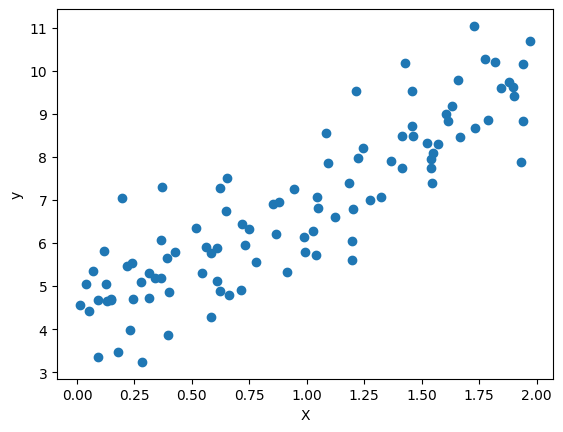

In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)



plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()


We can see that there is a linear relationship between X and y. Our goal is to find the values of the intercept and slope that minimize the mean squared error between the predicted values and the actual values.

## Batch Gradient Descent
Batch gradient descent is a version of gradient descent that uses the entire dataset to compute the gradient at each iteration. We will start with a simple implementation of batch gradient descent:

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances
theta = np.random.randn(2,1) # random initialization

X_b = np.c_[np.ones((m, 1)), X] # add bias term to X

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print('Intercept:', theta[0])
print('Slope:', theta[1])

Intercept: [4.21509616]
Slope: [2.77011339]


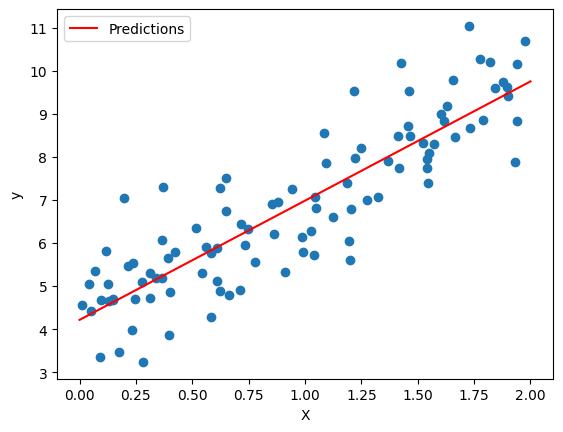

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

plt.scatter(X, y)
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

We can see that the line of best fit fits the data well.

#Stochastic Gradient Descent
Stochastic gradient descent (SGD) is a version of gradient descent that uses a single instance at a time to compute the gradient. SGD is faster than batch gradient descent, but the parameter updates are more noisy.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None, random_state=42)
sgd.fit(X, y.ravel())

print('Intercept:', sgd.intercept_)
print('Slope:', sgd.coef_)

Intercept: [4.24365286]
Slope: [2.8250878]


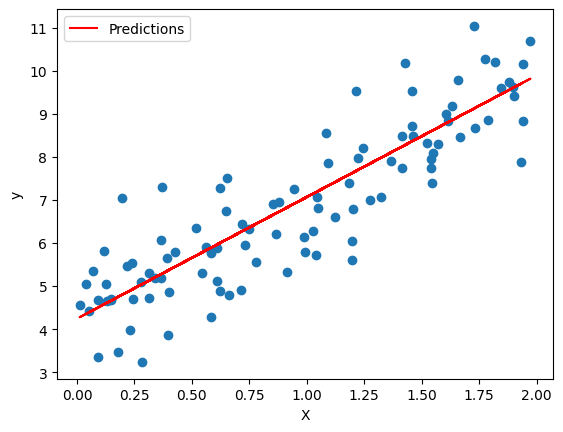

In [ ]:
y_predict = sgd.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

We can see that the line of best fit fits the data well, similar to batch gradient descent.

#Conclusion
In this notebook, we covered linear regression, optimizing error functions, and gradient descent. Linear regression is a simple and powerful method for modeling the relationship between a dependent variable and one or more independent variables. Optimizing error functions is essential for finding the best model parameters that fit the data. Gradient descent is an iterative optimization algorithm that is widely used in machine learning to minimize error functions.

##### PUNDA:
 Why did the data scientist break up with linear regression?

Because it wasn't optimizing their relationship!

#Day 14
## Classification

Classification is a technique in machine learning that is used to identify the category or class to which a new observation belongs. It involves building a model that can be used to predict the class of an observation based on its features or characteristics.

In this notebook, we'll explore some common classification algorithms and use them to classify data from different datasets.



Today, We'll be looking into breast cancer dataset which is available in the sklearn and we'll also be looking into some metrics which will help us in determining the performance of our model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_breast_cancer, load_iris
cancer = load_breast_cancer()
iris = load_iris()

In [ ]:
print(cancer.DESCR)

In [4]:
print(cancer.target_names)

['malignant' 'benign']


Here we're loading our dataset and spliting it for testing and training. we are also standardizing our dataset one can read more about this [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) . I will also cover this in comming days notebook.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_cancer = cancer.data
y_cancer = cancer.target

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_cancer = scaler.fit_transform(X_train_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

Here we are training a logistic Regression model for the classification. <br/>

Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

That means Logistic regression is usually used for Binary classification problems.

Binary Classification refers to predicting the output variable that is discrete in two classes.

A few examples of Binary classification are Yes/No, Pass/Fail, Win/Lose, Cancerous/Non-cancerous, etc.

[credit](https://www.analyticsvidhya.com/blog/2021/07/an-introduction-to-logistic-regression/)

Further we're demonstrating the accuracy score which could be calculated using the following formula: <br/> $$ \texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $$

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_cancer = LogisticRegression()
lr_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_cancer_lr = lr_cancer.predict(X_test_cancer)
accuracy_cancer_lr = accuracy_score(y_test_cancer, y_pred_cancer_lr)
print("Accuracy of Logistic Regression on Breast Cancer dataset:", accuracy_cancer_lr)


Accuracy of Logistic Regression on Breast Cancer dataset: 0.9824561403508771


#  K Nearest neighbour classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_cancer = KNeighborsClassifier()
knn_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_cancer_knn = knn_cancer.predict(X_test_cancer)
accuracy_cancer_knn = accuracy_score(y_test_cancer, y_pred_cancer_knn)
print("Accuracy of KNN on Breast Cancer dataset:", accuracy_cancer_knn)

Accuracy of KNN on Breast Cancer dataset: 0.9590643274853801


# Descision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_cancer = DecisionTreeClassifier()
dt_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_cancer_dt = dt_cancer.predict(X_test_cancer)
accuracy_cancer_dt = accuracy_score(y_test_cancer, y_pred_cancer_dt)
print("Accuracy of Decision Tree on Breast Cancer dataset:", accuracy_cancer_dt)


Accuracy of Decision Tree on Breast Cancer dataset: 0.9239766081871345


# Useful Metrics

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_cancer_lr = precision_score(y_test_cancer, y_pred_cancer_lr)
recall_cancer_lr = recall_score(y_test_cancer, y_pred_cancer_lr)
f1_cancer_lr = f1_score(y_test_cancer, y_pred_cancer_lr)
print("Precision, Recall, and F1 score for Logistic Regression on Breast Cancer dataset:")
print("Precision:", precision_cancer_lr)
print("Recall:", recall_cancer_lr)
print("F1 score:", f1_cancer_lr)

Precision, Recall, and F1 score for Logistic Regression on Breast Cancer dataset:
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1 score: 0.986046511627907


In [11]:
precision_cancer_knn = precision_score(y_test_cancer, y_pred_cancer_knn)
recall_cancer_knn = recall_score(y_test_cancer, y_pred_cancer_knn)
f1_cancer_knn = f1_score(y_test_cancer, y_pred_cancer_knn)
print("\nPrecision, Recall, and F1 score for KNN on Breast Cancer dataset:")
print("Precision:", precision_cancer_knn)
print("Recall:", recall_cancer_knn)
print("F1 score:", f1_cancer_knn)


Precision, Recall, and F1 score for KNN on Breast Cancer dataset:
Precision: 0.963302752293578
Recall: 0.9722222222222222
F1 score: 0.9677419354838711


In [12]:
precision_cancer_dt = precision_score(y_test_cancer, y_pred_cancer_dt)
recall_cancer_dt = recall_score(y_test_cancer, y_pred_cancer_dt)
f1_cancer_dt = f1_score(y_test_cancer, y_pred_cancer_dt)
print("\nPrecision, Recall, and F1 score for Decision Tree on Breast Cancer dataset:")
print("Precision:", precision_cancer_dt)
print("Recall:", recall_cancer_dt)
print("F1 score:", f1_cancer_dt)


Precision, Recall, and F1 score for Decision Tree on Breast Cancer dataset:
Precision: 0.9523809523809523
Recall: 0.9259259259259259
F1 score: 0.9389671361502347


In today's notebook, you may notice that I have not explained any algorithm or metrics at all. However, there is a reason behind this. I want you to take the initiative to go and read about every algorithm that we have used in today's notebook. Everything you need to know is just a Google search away. Consider this as your first exercise, which will help you in finding answers on your own and reading the documentation thoroughly. 
# Please do not worry; 
I will be going through each and every algorithm one by one in the upcoming learning days.